In [95]:
# CS412-HW2-KeremTufan-32554

# Machine Learning - Homework 2: Part 1

## 1. Dataset Generation

The dataset that will be used throughout this part is already created and split for you. Do not change any part of the code below.

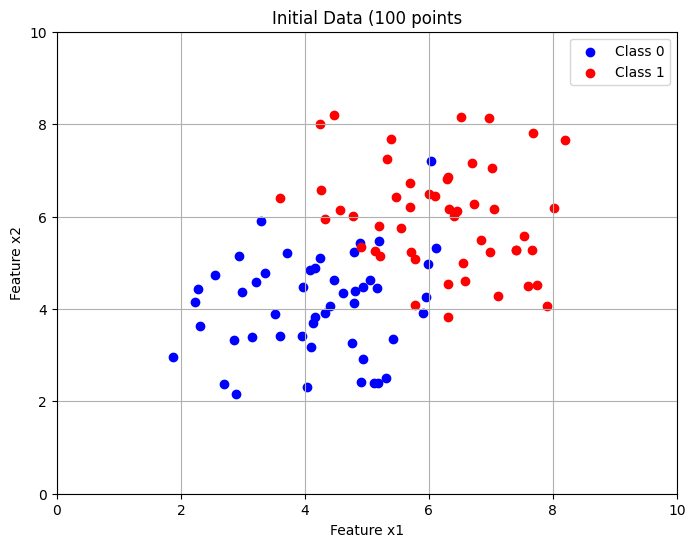

In [96]:
############# DO NOT CHANGE THIS PART #############

import numpy as np
import matplotlib.pyplot as plt

def generate_dataset(n_points_per_class, seed):
    """
    Generates a 2-class dataset with 2 features.
    The classes are Gaussian clusters that have some overlap.

    Args:
    n_points_per_class (int): Number of points for class 0 and class 1
    seed (int): Random seed for reproducibility

    Returns:
    X (ndarray): (n_points*2, 2) array of features
    y (ndarray): (n_points*2,) array of labels (0 or 1)
    """
    np.random.seed(seed)

    # Class 0 properties: Centered at (4, 4)
    mean_0 = [4, 4]
    # Covariance matrix: [[var_x, cov_xy], [cov_xy, var_y]]
    # This creates an elliptical cluster
    cov_0 = [[1.5, 0.5], [0.5, 1.5]]

    # Class 1 properties: Centered at (6, 6)
    mean_1 = [6, 6]
    # This cluster slants the other way
    cov_1 = [[1.5, -0.5], [-0.5, 1.5]]

    # Generate the points
    class_0_x = np.random.multivariate_normal(mean_0, cov_0, n_points_per_class)
    class_1_x = np.random.multivariate_normal(mean_1, cov_1, n_points_per_class)

    # Combine into X and y
    X = np.concatenate((class_0_x, class_1_x))
    y = np.array([0]*n_points_per_class + [1]*n_points_per_class)

    return X, y

# Dataset generation
seed = 42
n_points_total = 100
n_per_class = n_points_total // 2

X, y = generate_dataset(n_points_per_class=n_per_class, seed=seed)

# Displat the dataset
title = f"Initial Data ({n_points_total} points"
plt.figure(figsize=(8, 6))

# Plot the data points
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')

plt.xlim(0, 10) # Adjusted for new data
plt.ylim(0, 10) # Adjusted for new data
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend()
plt.title(title)
plt.grid(True)
plt.show()

############# DO NOT CHANGE THIS PART #############

In [97]:
w = [0.0, 0.0, 0.0]
n = 0.1

print("Dataset properties: ")
print(X.shape)  # (100, 2)
print(y.shape)  # (100,)
print(X[:1])    # [[3.60105347 3.40551822] x1, x2
print(y[:2])    # [0 0]

from math import e
def sigmoid(z):
  return  (1 / (1 + e ** -z))

def prediction_function(wt, X):

  prediction = [0] * len(X)
  for i in range(len(X)):
    z = wt[0] + wt[1]*X[i][0] + wt[2]*X[i][1]
    prediction[i] = sigmoid(z)

  return prediction

from math import log
def cost_function(prediction, y):

    total = 0

    for i in range(len(y)):
      total += y[i] * log(prediction[i]) + (1- y[i]) * log(1 - prediction[i])

    return -total / len(y)

def gradient_function(X, y, prediction):

  w0 = 0
  w1 = 0
  w2 = 0

  for i in range(len(y)):
    w0 += prediction[i] - y[i]
  w0 /= len(y)

  for i in range(len(y)):
    w1 += (prediction[i] - y[i]) * X[i][0]
  w1 /= len(y)

  for i in range(len(y)):
    w2 += (prediction[i] - y[i]) * X[i][1]
  w2 /= len(y)

  return [w0, w1, w2]

def gradient_update(w, n, gradient):
  for i in range(len(w)):
    w[i] -= n * gradient[i]



Dataset properties: 
(100, 2)
(100,)
[[3.60105347 3.40551822]]
[0 0]


In [98]:
# First Part of First Question
# 10 times gradient descent applied

w_final = w.copy()

for i in range(10):
  prediction = prediction_function(w_final, X) # Get prediction
  gradient = gradient_function(X, y, prediction) # Take derivative
  gradient_update(w_final, n, gradient) # Update the gradient


normal_arr = [float(x) for x in w_final]
formatted = [s[:s.find('.')+5] for s in [f"{x:.10f}" for x in normal_arr]] # Staff for first 4 digits after decimal point

print("Gradient coefficients (w0, w1, w2) after 10 rounds:")
print(formatted)


Gradient coefficients (w0, w1, w2) after 10 rounds:
['-0.0822', '0.0468', '0.0388']


In [99]:
error = 0

predicted_class = [1 if p >= 0.5 else 0 for p in prediction] # Classification, wrt 0.5
for i in range(len(y)):

  if(predicted_class[i] != y[i]): # Count wrong guesses
    error += 1

print("Error rate:", error / len(y))

cost = cost_function(prediction, y)
print("Cost:", f"{cost:.10f}"[:f"{cost:.10f}".find('.')+5])

Error rate: 0.5
Cost: 0.6690


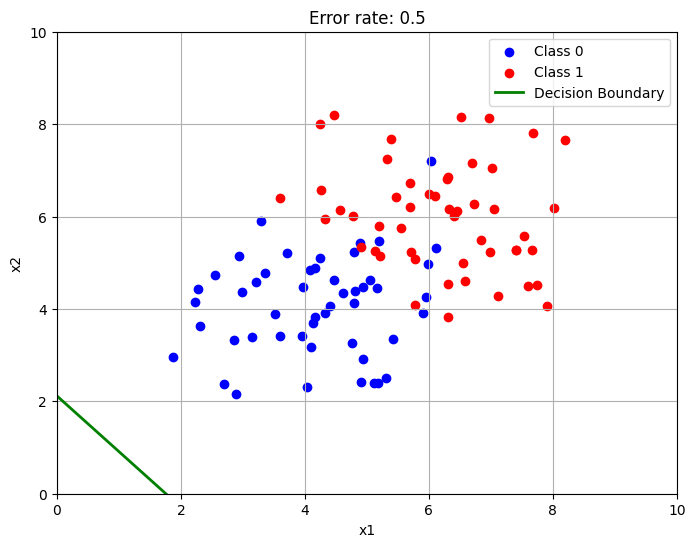

In [100]:
import numpy as np
import matplotlib.pyplot as plt

w0, w1, w2 = w_final


x1_min, x1_max = X[:,0].min() - 2, X[:,0].max() + 2
x1_vals = np.linspace(x1_min, x1_max, 200)


x2_vals = -(w1 / w2) * x1_vals - (w0 / w2)

plt.figure(figsize=(8, 6))
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='blue', label='Class 0')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='red', label='Class 1')

plt.title(f"Error rate: {error / len(y)}")

plt.plot(x1_vals, x2_vals, color='green', label='Decision Boundary', linewidth=2)


plt.xlim(0, 10)
plt.ylim(0, 10)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()

# Since the line classifies all data same and data set is splitted by 2, it predicts with a 0.5 error rate

In [101]:
# Part 2
w_final = w.copy()

prediction_first = prediction_function(w_final, X) # First prediction
cost_initial = cost_function(prediction_first, y) # Cost of first prediction

# Update prediction
gradient = gradient_function(X, y, prediction_first)
gradient_update(w_final, n, gradient)

prediction_second = prediction_function(w_final, X) # Second prediction
cost_second = cost_function(prediction_second, y) # Cost of second prediction
i = 1

while(abs(cost_initial - cost_second) > 0.00001): # Check until the wanted threshold
    # Old prediction saved
    prediction_first = prediction_second
    cost_initial = cost_second

    gradient = gradient_function(X, y, prediction_first)
    gradient_update(w_final, n, gradient)

    # New prediction
    prediction_second = prediction_function(w_final, X)
    cost_second = cost_function(prediction_second, y)
    i += 1
print("Number of iterations:",i)

normal_arr = [float(x) for x in w_final]
formatted = [s[:s.find('.')+5] for s in [f"{x:.10f}" for x in normal_arr]] # Staff for first 4 digits after decimal point

print("Gradient coefficients (w0, w1, w2) after rounds:")
print(formatted)



Number of iterations: 4102
Gradient coefficients (w0, w1, w2) after rounds:
['-10.5776', '1.0298', '1.0452']


In [102]:
error = 0

predicted_class = [1 if p >= 0.5 else 0 for p in prediction_second] # Classification, wrt 0.5
for i in range(len(y)):

  if(predicted_class[i] != y[i]): # Count wrong guesses
    error += 1

print("Error rate:", error / len(y))

cost = cost_function(prediction_second, y)
print("Cost:", f"{cost:.10f}"[:f"{cost:.10f}".find('.')+5])

Error rate: 0.09
Cost: 0.2629


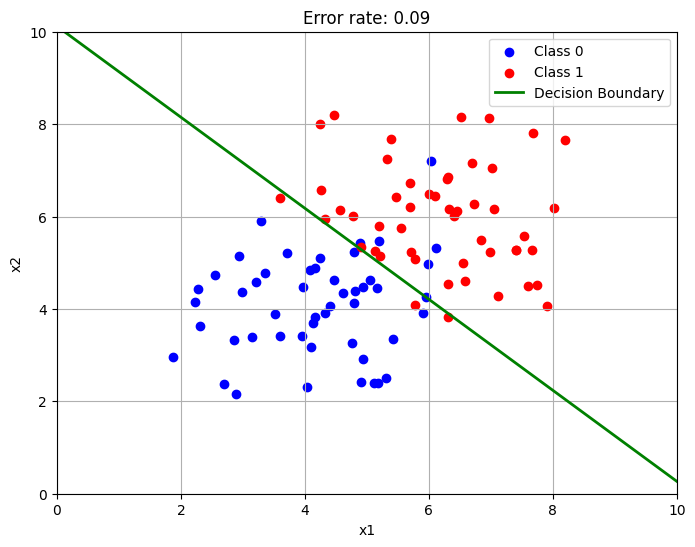

In [103]:
import numpy as np
import matplotlib.pyplot as plt

w0, w1, w2 = w_final


x1_min, x1_max = X[:,0].min() - 2, X[:,0].max() + 2
x1_vals = np.linspace(x1_min, x1_max, 200)


x2_vals = -(w1 / w2) * x1_vals - (w0 / w2)

plt.figure(figsize=(8, 6))
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='blue', label='Class 0')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='red', label='Class 1')

plt.title(f"Error rate: {error / len(y)}")


plt.plot(x1_vals, x2_vals, color='green', label='Decision Boundary', linewidth=2)


plt.xlim(0, 10)
plt.ylim(0, 10)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()

## 1. Dataset Generation

The dataset that will be used throughout this part is already created and split for you. Do not change any part of the code below.

# Machine Learning - Homework 2: Part 2

## 1. Dataset Generation

The dataset that will be used throughout this part is already created and split for you. Do not change any part of the code below.

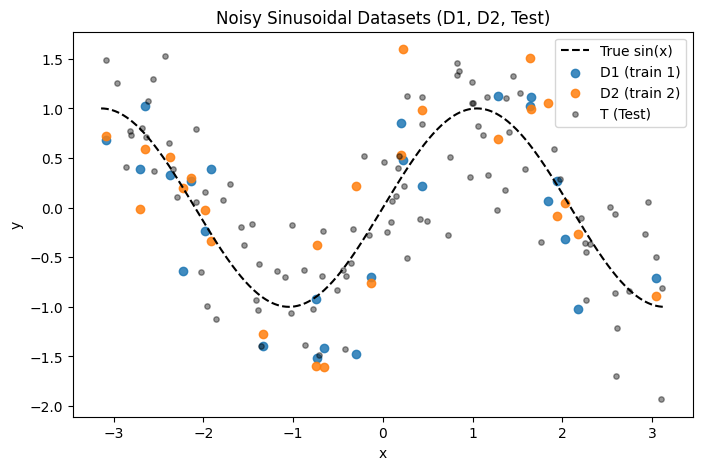

In [104]:
############# DO NOT CHANGE THIS PART #############

import numpy as np
import matplotlib.pyplot as plt

# Initial configurations
N_train = 25                 # points in D1 and D2
N_test = 100                 # points in test set
sigma = 0.5                 # standard deviation of noise
period = 2 * np.pi           # one period of sine wave
freq = 1.5                   # frequency of the sinusoidal
start_point = -period/2
end_point = start_point + period

# Dataset generation function
def make_dataset(n_points, sigma, seed_x, seed_noise):
    rng_x = np.random.default_rng(seed_x)
    rng_n = np.random.default_rng(seed_noise)

    X = np.sort(rng_x.uniform(start_point, end_point, size=n_points))
    noise = rng_n.normal(0.0, sigma, size=n_points)
    y = np.sin(freq*X) + noise

    return X.reshape(-1, 1), y

# Create datasets
X1, y1 = make_dataset(N_train, sigma, seed_x=412955, seed_noise=412067)  # D1
X2, y2 = make_dataset(N_train, sigma, seed_x=412955, seed_noise=412085)  # D2
Xt, yt = make_dataset(N_test,  sigma, seed_x=412738, seed_noise=412222)  # Test set

# Visualize the generated data
plt.figure(figsize=(8,5))
x_true = np.linspace(start_point, end_point, 400)
y_true = np.sin(freq*x_true)

plt.plot(x_true, y_true, 'k--', label='True sin(x)')
plt.scatter(X1, y1, color='tab:blue', label='D1 (train 1)', alpha=0.85)
plt.scatter(X2, y2, color='tab:orange', label='D2 (train 2)', alpha=0.85)
plt.scatter(Xt, yt, color='black', label='T (Test)', alpha=0.4, s=15)
plt.legend()
plt.title("Noisy Sinusoidal Datasets (D1, D2, Test)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


############# DO NOT CHANGE THIS PART #############

In [105]:
#
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error


# 3rd degree with D1
poly3_d1 = PolynomialFeatures(degree=3)  # 3rd-degree
X1_poly3_d1 = poly3_d1.fit_transform(X1.reshape(-1,1))

model3_d1 = LinearRegression()
model3_d1.fit(X1_poly3_d1, y1)

X_test_poly3_d1 = poly3_d1.transform(Xt.reshape(-1,1))
y_pred3_d1= model3_d1.predict(X_test_poly3_d1)

mse3_d1 = mean_squared_error(yt, y_pred3_d1)
print("mse3_d1:", f"{mse3_d1:.10f}"[:f"{mse3_d1:.10f}".find('.')+5])

# 3rd degree with D2
poly3_d2 = PolynomialFeatures(degree=3)  # 3rd-degree
X2_poly3_d2 = poly3_d2.fit_transform(X2.reshape(-1,1))

model3_d2 = LinearRegression()
model3_d2.fit(X2_poly3_d2, y2)

X_test_poly3_d2 = poly3_d2.transform(Xt.reshape(-1,1))
y_pred3_d2= model3_d2.predict(X_test_poly3_d2)

mse3_d2= mean_squared_error(yt, y_pred3_d2)
print("mse3_d2:", f"{mse3_d2:.10f}"[:f"{mse3_d2:.10f}".find('.')+5])


# train test mse
# 5th degree with D1 - train MSE
#y_train_pred3_d1 = model3_d1.predict(X1_poly3_d1)
# mse3_d1_train = mean_squared_error(y1, y_train_pred3_d1)
# print("Train MSE 3th-degree D1:", mse3_d1_train)

# 5th degree with D2 - train MSE
#y_train_pred3_d2 = model3_d2.predict(X2_poly3_d2)
# mse3_d2_train = mean_squared_error(y2, y_train_pred3_d2)
# print("Train MSE 5th-degree D2:", mse3_d2_train)


mse3_d1: 0.3757
mse3_d2: 0.3549


D2 dataset is better for model education, since D2_model has a lower mse. Of course, this might be due to test_set.

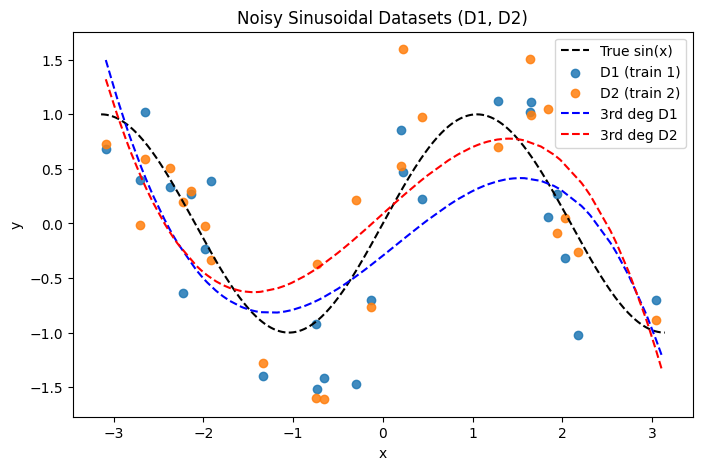

In [106]:
plt.figure(figsize=(8,5))
x_true = np.linspace(start_point, end_point, 400)
y_true = np.sin(freq*x_true)

plt.plot(x_true, y_true, 'k--', label='True sin(x)')
plt.scatter(X1, y1, color='tab:blue', label='D1 (train 1)', alpha=0.85)
plt.scatter(X2, y2, color='tab:orange', label='D2 (train 2)', alpha=0.85)

plt.plot(Xt, y_pred3_d1, color='blue', linestyle='--', label='3rd deg D1')
plt.plot(Xt, y_pred3_d2, color='red', linestyle='--', label='3rd deg D2')
plt.legend()
plt.title("Noisy Sinusoidal Datasets (D1, D2)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Both of the polynomials have low variance, and they do not exactly fit with the true sin, even though visually they share a common shape with the true sin.

In [107]:
# 5rd degree with D1
poly5_d1 = PolynomialFeatures(degree=5)  # 5rd-degree
X1_poly5_d1 = poly5_d1.fit_transform(X1.reshape(-1,1))

model5_d1 = LinearRegression()
model5_d1.fit(X1_poly5_d1, y1)

X_test_poly5_d1 = poly5_d1.transform(Xt.reshape(-1,1))
y_pred5_d1= model5_d1.predict(X_test_poly5_d1)

mse5_d1 = mean_squared_error(yt, y_pred5_d1)
print("mse5_d1:", f"{mse5_d1:.10f}"[:f"{mse5_d1:.10f}".find('.')+5])


# 5rd degree with D2
poly5_d2 = PolynomialFeatures(degree=5)  # 5rd-degree
X2_poly5_d2 = poly5_d2.fit_transform(X2.reshape(-1,1))

model5_d2 = LinearRegression()
model5_d2.fit(X2_poly5_d2, y2)

X_test_poly5_d2 = poly5_d2.transform(Xt.reshape(-1,1))
y_pred5_d2= model5_d2.predict(X_test_poly5_d2)

mse5_d2= mean_squared_error(yt, y_pred5_d2)
print("mse5_d2:", f"{mse5_d2:.10f}"[:f"{mse5_d2:.10f}".find('.')+5])



# train test mse
# 5th degree with D1 - train MSE
# y_train_pred5_d1 = model5_d1.predict(X1_poly5_d1)
# mse5_d1_train = mean_squared_error(y1, y_train_pred5_d1)
# print("Train MSE 5th-degree D1:", mse5_d1_train)

# 5th degree with D2 - train MSE
# y_train_pred5_d2 = model5_d2.predict(X2_poly5_d2)
# mse5_d2_train = mean_squared_error(y2, y_train_pred5_d2)
# print("Train MSE 5th-degree D2:", mse5_d2_train)


mse5_d1: 0.3771
mse5_d2: 0.3886


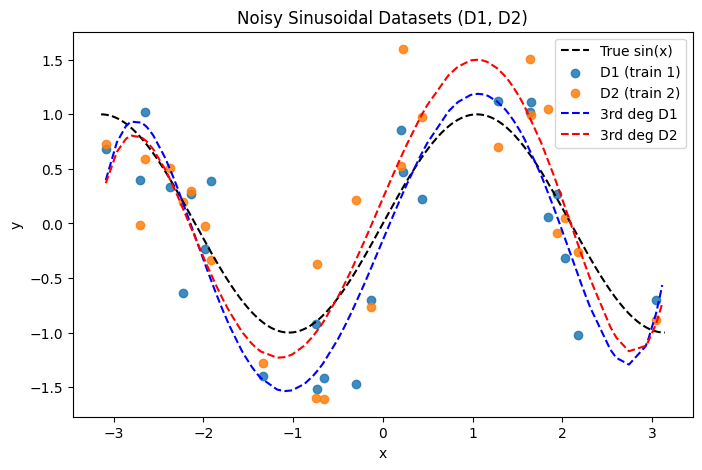

In [108]:
plt.figure(figsize=(8,5))
x_true = np.linspace(start_point, end_point, 400)
y_true = np.sin(freq*x_true)

plt.plot(x_true, y_true, 'k--', label='True sin(x)')
plt.scatter(X1, y1, color='tab:blue', label='D1 (train 1)', alpha=0.85)
plt.scatter(X2, y2, color='tab:orange', label='D2 (train 2)', alpha=0.85)

plt.plot(Xt, y_pred5_d1, color='blue', linestyle='--', label='3rd deg D1')
plt.plot(Xt, y_pred5_d2, color='red', linestyle='--', label='3rd deg D2')
plt.legend()
plt.title("Noisy Sinusoidal Datasets (D1, D2)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

High-degree polynomials generally exhibit low bias and high variance. These polynomials are better at predicting the dataset and their shape looks similar to the true sin. Visually, I can say that these polynomials have higher variance since they match better.

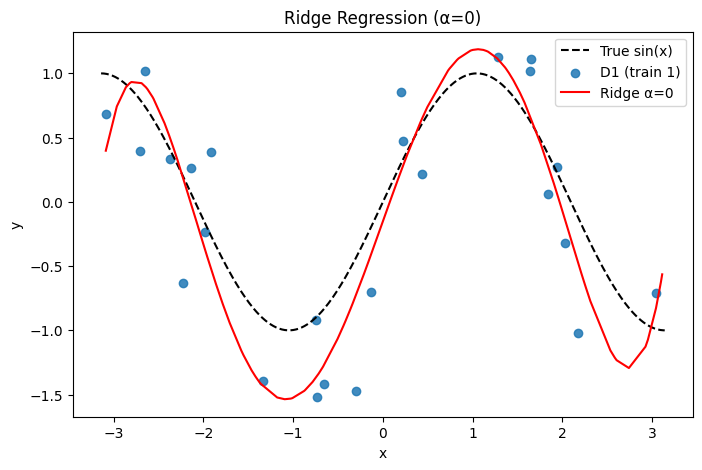

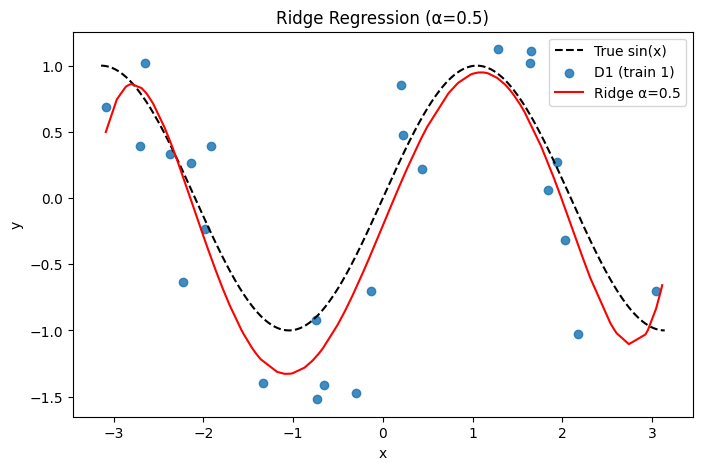

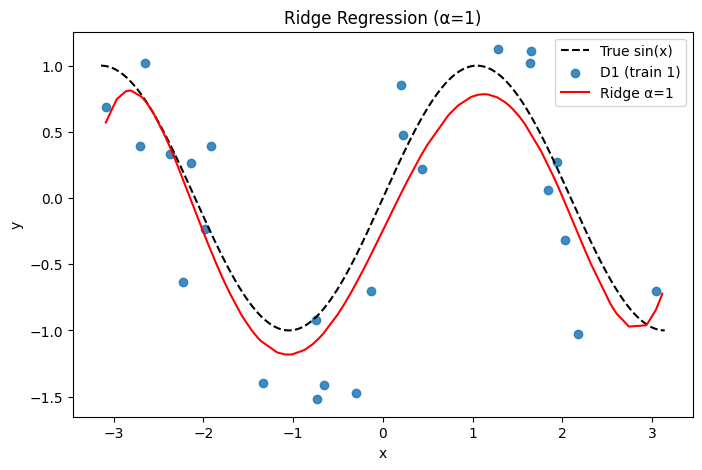

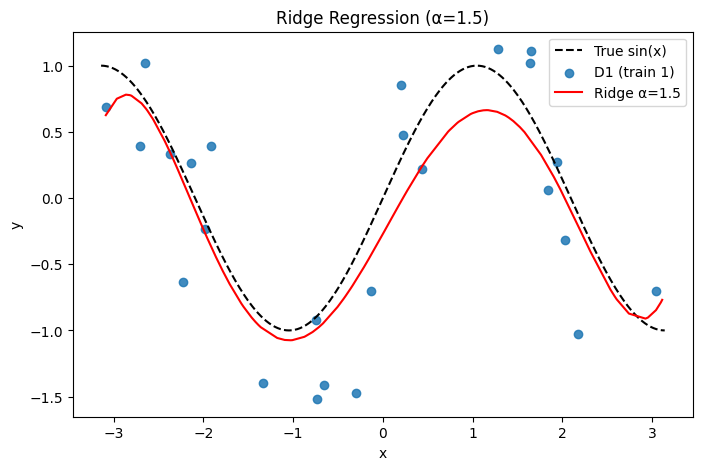

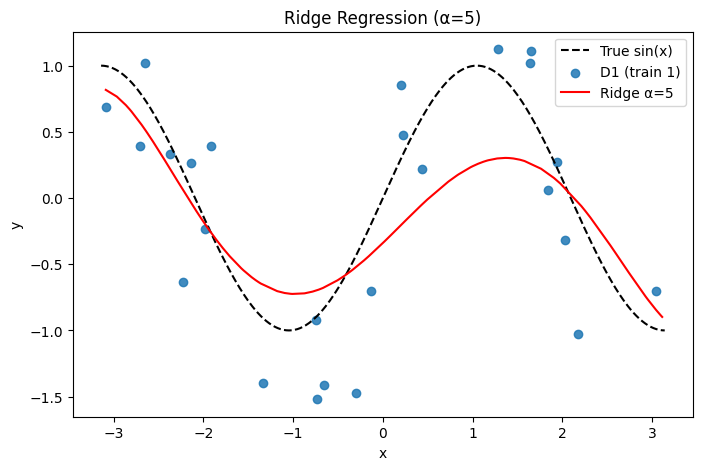

In [109]:
alphas = [0, 0.5, 1, 1.5, 5]


# Model creating part
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X1.reshape(-1,1))
X_test_poly = poly.transform(Xt.reshape(-1,1))

train_mse_list = []
test_mse_list = []

# Each alpha will be tried
for alpha in alphas:
  model = Ridge(alpha=alpha)
  model.fit(X_train_poly, y1)

  y_train_pred = model.predict(X_train_poly)
  y_test_pred = model.predict(X_test_poly)

  train_mse = mean_squared_error(y1, y_train_pred) # mse calculations, use of external library
  test_mse = mean_squared_error(yt, y_test_pred)   # mse calculations, use of external library

  train_mse_list.append(train_mse)
  test_mse_list.append(test_mse)

  plt.figure(figsize=(8,5))
  x_true = np.linspace(start_point, end_point, 400)
  y_true = np.sin(freq*x_true)

  plt.plot(x_true, y_true, 'k--', label='True sin(x)')
  plt.scatter(X1, y1, color='tab:blue', label='D1 (train 1)', alpha=0.85)
  plt.plot(Xt, y_test_pred, color='red', label=f'Ridge α={alpha}')

  plt.legend()
  plt.title(f'Ridge Regression (α={alpha})')
  plt.xlabel("x")
  plt.ylabel("y")
  plt.show()


In [110]:
for i, alpha in enumerate(alphas):
    space = ""
    if ( i % 2 == 0):
       space = "  "

    tr = f"{train_mse_list[i]:.10f}"
    te = f"{test_mse_list[i]:.10f}"
    tr = tr[:tr.find('.')+5]
    te = te[:te.find('.')+5]
    print(f"α={alpha}{space} | Train MSE: {tr} | Test MSE: {te}")

α=0   | Train MSE: 0.1713 | Test MSE: 0.3771
α=0.5 | Train MSE: 0.1835 | Test MSE: 0.3033
α=1   | Train MSE: 0.2067 | Test MSE: 0.2797
α=1.5 | Train MSE: 0.2318 | Test MSE: 0.2771
α=5   | Train MSE: 0.3575 | Test MSE: 0.3517
